png 
  2

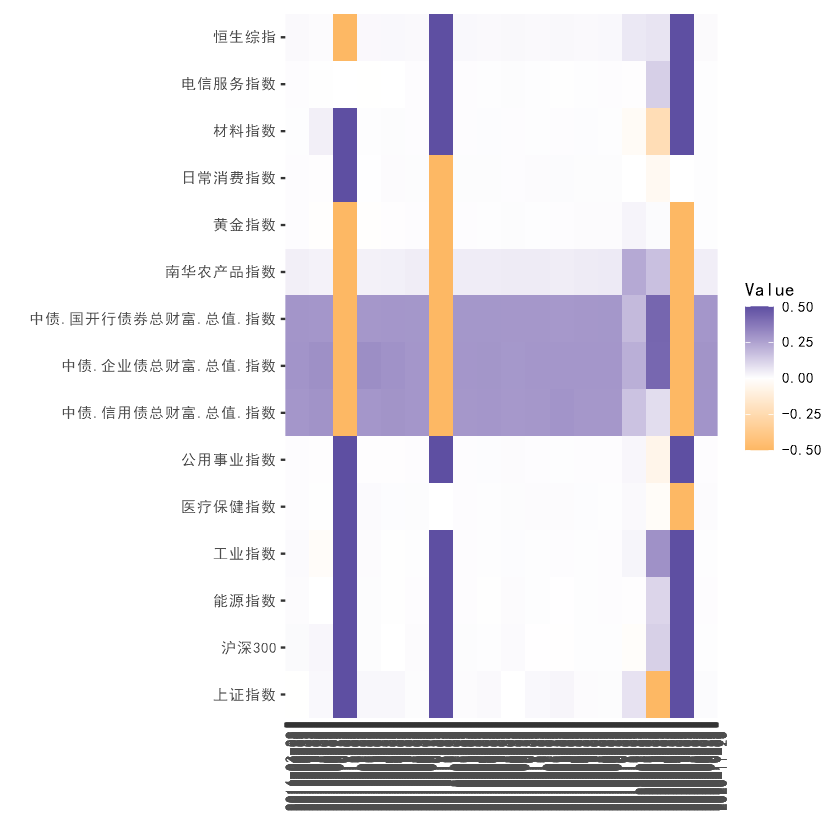

In [12]:
library(dplyr) # easier data wrangling 
library(viridis) # colour blind friendly palette, works in B&W also
library(Interpol.T) #  will generate a large dataset on initial load
library(lubridate) # for easy date manipulation
library(ggExtra) # because remembering ggplot theme options is beyond me
library(tidyr) 
library(plotly)
library(hrbrthemes)
library(ggplot2)
library(readxl)
library(pheatmap)
library(reshape2)
library(RColorBrewer)
library(Cairo)

# set current path as working directory
setwd("../Black_Litterman_Model")
options (warn = -1)

## Weights
# load and melt data
views <- read.table('view.csv',header=T,sep=",",fileEncoding="UTF-8")
colnames(views) <- c("Date",colnames(views)[2:16])
#views$Date <- as.Date(views$Date)
views_mt <- melt(views,id.vars = 1)
colnames(views_mt) = c("Date","Gp","Value")


# plot
CairoPDF('Heatmap_BL_Weight.pdf', width= 9, height = 4)
ggplot(data = views_mt, aes(x=Date, y=Gp, fill=Value)) + 
    xlab("")+ ylab("") +
    scale_fill_gradient2(high = "#5E4FA2",low="#FDB864")+
    theme(text=element_text(family="SimHei")) +
    theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust = 1)) +
    geom_raster()
dev.off()

In [7]:
# Asset
asset <- read.table('BL_Asset.csv',header=T,sep=",",fileEncoding="UTF-8")
colnames(asset) <- c("Date",colnames(asset)[2:3])

In [9]:
asset$Date <- as.Date(asset$Date)
asset <- melt(asset,id.vars = 1)
colnames(asset) <- c("Date","Model","Value")

png 
  2

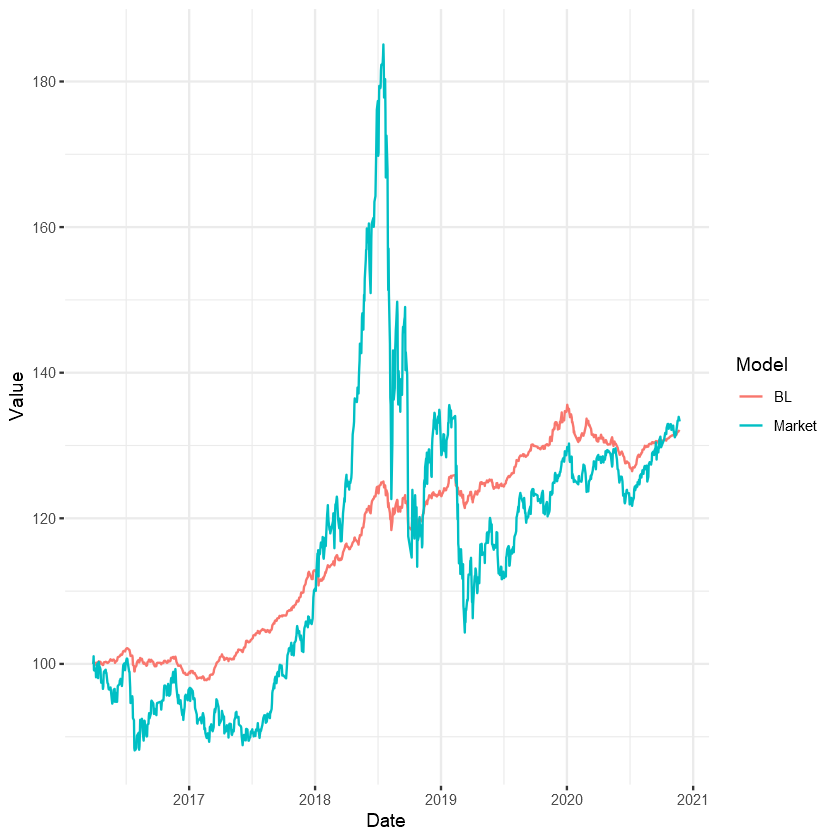

In [10]:
# plot
CairoPDF('BL_Asset.pdf', width= 9, height = 4)

ggplot() +
    geom_line(data = asset, aes(x=Date, y=Value,color=Model),) +
    theme_ipsum() + theme_bw() + theme(legend.position="right") +
    theme(panel.border = element_blank(),
          axis.line = element_line(colour = "white")) +
    theme(plot.title = element_text(size=10))
dev.off()